<a href="https://colab.research.google.com/github/radyani/FAO_Crops/blob/main/Exploration%20of%20fao_data_crops_data/FAO_Crops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FAO Crops Yield**

### **Libraries**

In [457]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### **Dataset**

In [458]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [459]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/fao_data_crops_data.csv')

In [460]:
df.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005.0,Ha,49404.0,A,agave_fibres_nes
3,Americas +,31,Area Harvested,2004.0,Ha,49113.0,A,agave_fibres_nes
4,Americas +,31,Area Harvested,2003.0,Ha,48559.0,A,agave_fibres_nes


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255349 entries, 0 to 2255348
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   country_or_area  object 
 1   element_code     object 
 2   element          object 
 3   year             float64
 4   unit             object 
 5   value            float64
 6   value_footnotes  object 
 7   category         object 
dtypes: float64(2), object(6)
memory usage: 137.7+ MB


# **Data Pre-Processing**

## **Initial Cleaning**

In [462]:
df.isnull().sum()

country_or_area         0
element_code            0
element               964
year                  964
unit                  964
value                 964
value_footnotes    479382
category                0
dtype: int64

In [463]:
df.isnull().sum() * 100 / len(df)

country_or_area     0.000000
element_code        0.000000
element             0.042743
year                0.042743
unit                0.042743
value               0.042743
value_footnotes    21.255336
category            0.000000
dtype: float64

Column `value_footnotes` with high null data might not be necessary for analysis since the purpose cannot be understood.
Other data with null values will be dropped as the percentage is considerably low (<5%).

In [464]:
df = df.drop(columns=['value_footnotes'])
df.dropna(how='any', inplace=True)

In [465]:
df.isnull().sum()

country_or_area    0
element_code       0
element            0
year               0
unit               0
value              0
category           0
dtype: int64

## **Understanding the Data**

In [466]:
# Unique values in columns
cols = ['country_or_area', 'element']
for i in df[cols]:
    print(f"Value counts of {i} column")
    a = df[i].value_counts()
    print(a, '\n')

Value counts of country_or_area column
World +              27683
Asia +               25474
Americas +           25239
Africa +             23970
South America +      22231
                     ...  
US Virgin Islands      235
Montenegro             228
Marshall Islands       153
Saint Helena            94
Liechtenstein           94
Name: country_or_area, Length: 253, dtype: int64 

Value counts of element column
Production Quantity                     692208
Area Harvested                          671153
Yield                                   631078
Seed                                    204568
Gross Production 1999-2001 (1000 I$)      9399
Net Production 1999-2001 (1000 I$)        9399
Gross PIN (base 1999-2001)                9145
Grs per capita PIN (base 1999-2001)       9145
Net PIN (base 1999-2001)                  9145
Net per capita PIN (base 1999-2001)       9145
Name: element, dtype: int64 



Column `country_or_area` shows that the data consist of data per country, per region, or overall in the world.

Column `element` shows that there are several type of information that can be extracted from the dataset.

Column `element_code` represents the codification of the column `element`.

Column `category` shows the crop type that the data is representing.

Column `value` is showing the value of `element` of a `category` in a certain `country_or_area` within a `year`.

Column `unit` shows the unit of the `value`.

## **Initial Objective Identification**

Objective: Analyze the Yield of Crops

In [467]:
df.head()

,country_or_area,element_code,element,year,unit,value,category
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,agave_fibres_nes
2,Americas +,31,Area Harvested,2005.0,Ha,49404.0,agave_fibres_nes
3,Americas +,31,Area Harvested,2004.0,Ha,49113.0,agave_fibres_nes
4,Americas +,31,Area Harvested,2003.0,Ha,48559.0,agave_fibres_nes


In [468]:
df.element.unique()

array(['Area Harvested', 'Yield', 'Production Quantity', 'Seed',
       'Gross Production 1999-2001 (1000 I$)',
       'Net Production 1999-2001 (1000 I$)', 'Gross PIN (base 1999-2001)',
       'Grs per capita PIN (base 1999-2001)', 'Net PIN (base 1999-2001)',
       'Net per capita PIN (base 1999-2001)'], dtype=object)

Variables kept in `element` would be:
1. Area harvested
2. Yield
3. Production Quantity
4. Seed

## **Tidy Up the Data**

### **Cleaning `element`**

In [469]:
df = df.drop(columns=['element_code'])

In [470]:
to_del =['Gross Production 1999-2001 (1000 I$)','Net Production 1999-2001 (1000 I$)', 'Gross PIN (base 1999-2001)',
       'Grs per capita PIN (base 1999-2001)', 'Net PIN (base 1999-2001)',
       'Net per capita PIN (base 1999-2001)']

In [471]:
for i in to_del:
  df.drop(df[df['element'] == i].index, inplace = True)

In [472]:
df.head()

,country_or_area,element,year,unit,value,category
0,Americas +,Area Harvested,2007.0,Ha,49404.0,agave_fibres_nes
1,Americas +,Area Harvested,2006.0,Ha,49404.0,agave_fibres_nes
2,Americas +,Area Harvested,2005.0,Ha,49404.0,agave_fibres_nes
3,Americas +,Area Harvested,2004.0,Ha,49113.0,agave_fibres_nes
4,Americas +,Area Harvested,2003.0,Ha,48559.0,agave_fibres_nes


In [473]:
df[['element', 'unit']].value_counts()

element              unit  
Production Quantity  tonnes    692208
Area Harvested       Ha        671153
Yield                Hg/Ha     631078
Seed                 tonnes    204568
dtype: int64

In [474]:
df.rename(columns = {'country_or_area':'Area', 'category':'Crops_Type', 'year' : 'Year'}, inplace = True)

In [475]:
df['element'] = df['element'].map({'Area Harvested': 'Area_Harvested(Ha)', 'Production Quantity': 'Production_Qty(tonnes)', 'Seed': 'Seed_Qty(tonnes)', 'Yield': 'Yield(hg/ha)'})

In [476]:
df.head()

,Area,element,Year,unit,value,Crops_Type
0,Americas +,Area_Harvested(Ha),2007.0,Ha,49404.0,agave_fibres_nes
1,Americas +,Area_Harvested(Ha),2006.0,Ha,49404.0,agave_fibres_nes
2,Americas +,Area_Harvested(Ha),2005.0,Ha,49404.0,agave_fibres_nes
3,Americas +,Area_Harvested(Ha),2004.0,Ha,49113.0,agave_fibres_nes
4,Americas +,Area_Harvested(Ha),2003.0,Ha,48559.0,agave_fibres_nes


In [477]:
df.element.unique()

array(['Area_Harvested(Ha)', 'Yield(hg/ha)', 'Production_Qty(tonnes)',
       'Seed_Qty(tonnes)'], dtype=object)

### **Change `element` to columns**

In [478]:
df = df.pivot_table(index=['Area', 'Year', 'Crops_Type'], columns='element',
                     values='value', aggfunc='first').reset_index()
df = df.rename_axis(None, axis=1)

In [479]:
df.head()

,Area,Year,Crops_Type,Area_Harvested(Ha),Production_Qty(tonnes),Seed_Qty(tonnes),Yield(hg/ha)
0,Afghanistan,1961.0,almonds_with_shell,0.0,0.0,NaN,0.0
1,Afghanistan,1961.0,anise_badian_fennel_corian,0.0,0.0,NaN,0.0
2,Afghanistan,1961.0,apples,2220.0,15100.0,NaN,68018.0
3,Afghanistan,1961.0,apricots,4820.0,32000.0,NaN,66390.0
4,Afghanistan,1961.0,barley,350000.0,378000.0,28000.0,10800.0


## **Final Cleaning**

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693102 entries, 0 to 693101
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Area                    693102 non-null  object 
 1   Year                    693102 non-null  float64
 2   Crops_Type              693102 non-null  object 
 3   Area_Harvested(Ha)      671153 non-null  float64
 4   Production_Qty(tonnes)  692208 non-null  float64
 5   Seed_Qty(tonnes)        204568 non-null  float64
 6   Yield(hg/ha)            631078 non-null  float64
dtypes: float64(5), object(2)
memory usage: 37.0+ MB


In [481]:
df.isnull().sum() * 100 / len(df)

Area                       0.000000
Year                       0.000000
Crops_Type                 0.000000
Area_Harvested(Ha)         3.166778
Production_Qty(tonnes)     0.128985
Seed_Qty(tonnes)          70.485152
Yield(hg/ha)               8.948755
dtype: float64

1. Too many null values in `Seed_Qty(tonnes`, we will drop it.
2. Other rows with null values will be dropped.

In [482]:
df['Year'] = df['Year'].astype(int)

In [483]:
df = df.drop(columns=['Seed_Qty(tonnes)'])
df.dropna(how='any', inplace=True)
df = df[df['Area_Harvested(Ha)'] != 0]
df = df[df['Production_Qty(tonnes)'] != 0]
df = df[df['Yield(hg/ha)'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543527 entries, 2 to 693101
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Area                    543527 non-null  object 
 1   Year                    543527 non-null  int64  
 2   Crops_Type              543527 non-null  object 
 3   Area_Harvested(Ha)      543527 non-null  float64
 4   Production_Qty(tonnes)  543527 non-null  float64
 5   Yield(hg/ha)            543527 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 29.0+ MB


# **Standard EDA**

## **Statistical Summary**

In [484]:
num = ['Year', 'Area_Harvested(Ha)', 'Production_Qty(tonnes)', 'Area_Harvested(Ha)', 'Production_Qty(tonnes)', 'Yield(hg/ha)']
cat = ['Area', 'Crops_Type']

In [485]:
df[num].describe()

,Year,Area_Harvested(Ha),Production_Qty(tonnes),Area_Harvested(Ha),Production_Qty(tonnes),Yield(hg/ha)
count,543527.000000,5.435270e+05,5.435270e+05,5.435270e+05,5.435270e+05,5.435270e+05
mean,1985.630738,1.215199e+06,3.691149e+06,1.215199e+06,3.691149e+06,9.515741e+04
std,13.621882,1.276268e+07,3.473171e+07,1.276268e+07,3.473171e+07,7.115912e+05
min,1961.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
25%,1974.000000,1.300000e+03,4.199000e+03,1.300000e+03,4.199000e+03,1.023500e+04
50%,1987.000000,1.110700e+04,3.948000e+04,1.110700e+04,3.948000e+04,3.782500e+04
75%,1998.000000,1.028730e+05,3.503695e+05,1.028730e+05,3.503695e+05,1.000000e+05
max,2007.000000,7.266120e+08,2.351396e+09,7.266120e+08,2.351396e+09,1.374956e+08


In [486]:
df[cat].describe()

,Area,Crops_Type
count,543527,543527
unique,245,170
top,World +,vegetables_melons_total
freq,7941,10047


## **Univariate Analysis**

### **Detect Outlier with Boxplot**

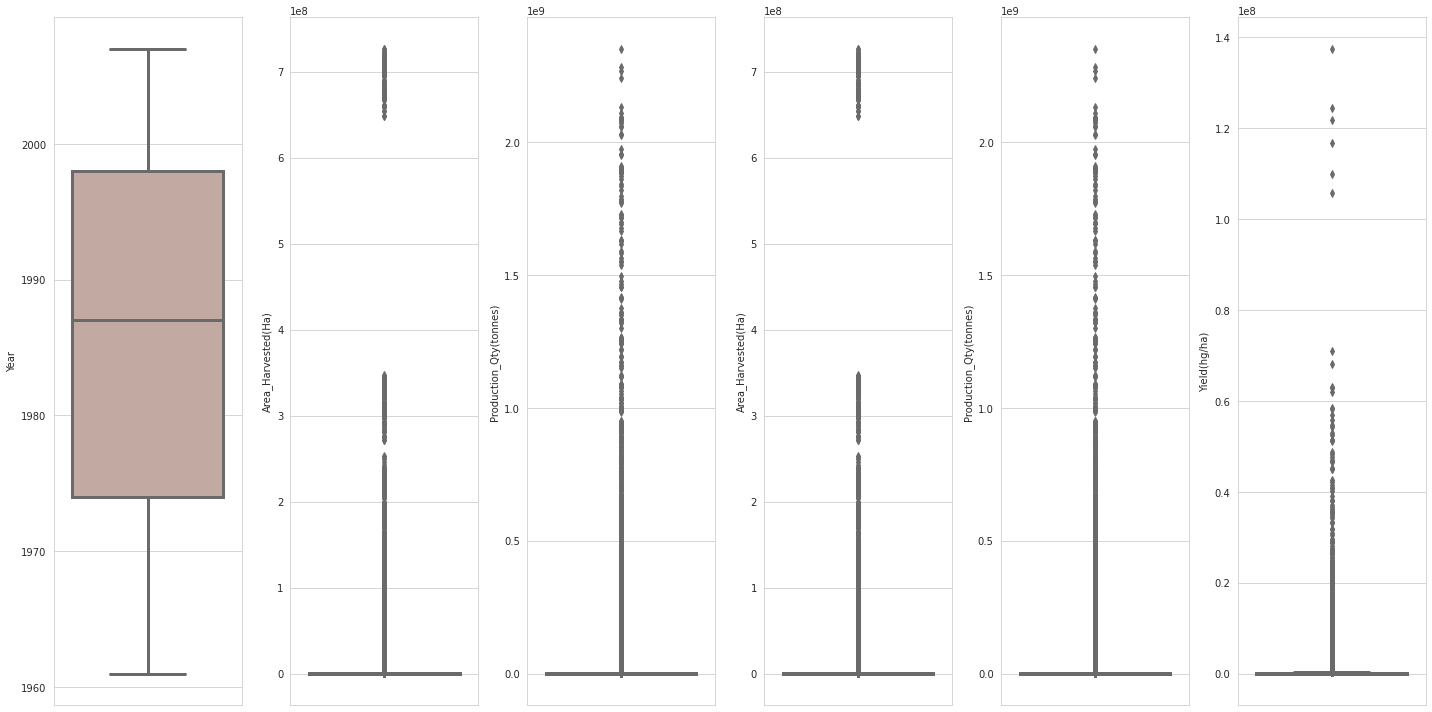

In [487]:
#plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1,6, figsize=(20, 10))

features = num
sns.set_style("whitegrid")
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color = 'darksalmon', saturation = 0.3, linewidth = 3)
    plt.tight_layout()

### **Numerical Data Distribution using KDE**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

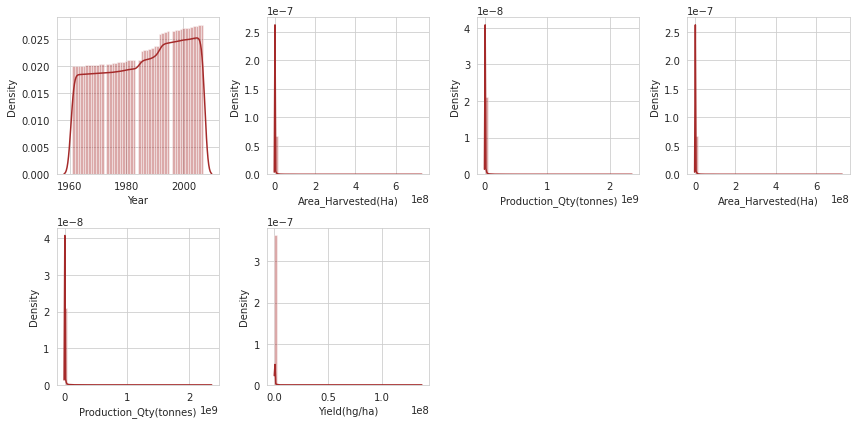

In [488]:
plt.figure(figsize=(12,6))

for i in range(0, len(num)):
    plt.subplot(2, len(num)//2 + 1, i+1)
    #plt.subplot(1, len(num), i+1)
    sns.distplot(x=df[num[i]], color='brown')
    plt.xlabel(num[i])
    plt.tight_layout()

## **Multivariate Analysis**

### **Correlation Map**

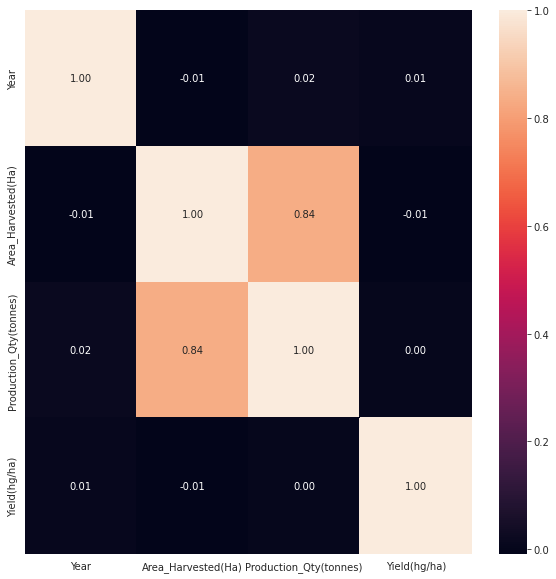

In [489]:
correlation = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(correlation, annot=True, fmt='.2f')

# **Splitting Data for Analysis**

## **Data Only Countries**

In [490]:
# Exclude regions or world
only_countries = df[~df.Area.str.contains(' +')]

In [491]:
only_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309917 entries, 2 to 693101
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Area                    309917 non-null  object 
 1   Year                    309917 non-null  int64  
 2   Crops_Type              309917 non-null  object 
 3   Area_Harvested(Ha)      309917 non-null  float64
 4   Production_Qty(tonnes)  309917 non-null  float64
 5   Yield(hg/ha)            309917 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 16.6+ MB


### **Area_Harvested For Countries Only**

In [492]:
harvest_country = only_countries
harvest_country = harvest_country.drop(columns=['Production_Qty(tonnes)', 'Yield(hg/ha)'])
harvest_country.head()

,Area,Year,Crops_Type,Area_Harvested(Ha)
2,Afghanistan,1961,apples,2220.0
3,Afghanistan,1961,apricots,4820.0
4,Afghanistan,1961,barley,350000.0
5,Afghanistan,1961,berries_nes,6800.0
6,Afghanistan,1961,cereals_rice_milled_eqv,3313500.0


In [493]:
allharvest_country = harvest_country.groupby(['Area','Year'])['Area_Harvested(Ha)'].sum().reset_index()
allharvest_country.head()

,Area,Year,Area_Harvested(Ha)
0,Afghanistan,1961,11834963.0
1,Afghanistan,1962,12229684.0
2,Afghanistan,1963,12358092.0
3,Afghanistan,1964,12444122.0
4,Afghanistan,1965,12298066.0


In [494]:
allharvest_country2 = allharvest_country.pivot(index='Year', columns='Area', values='Area_Harvested(Ha)')
allharvest_country2.head()

Area,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,Tuvalu,USSR,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1961,11834963.0,1511161.0,10340218.0,4561905.0,47124855.0,NaN,28716888.0,3855784.0,NaN,5586.0,...,9642.0,480496560.0,11567096.0,NaN,4026730.0,NaN,212872.0,5023870.0,4047154.0,6123985.0
1962,12229684.0,1451892.0,11033950.0,4847392.0,42927385.0,NaN,30879537.0,3847090.0,NaN,5894.0,...,9642.0,497681976.0,11071810.0,NaN,3904114.0,NaN,213106.0,5163432.0,4058386.0,6191048.0
1963,12358092.0,1400561.0,10926555.0,4829111.0,51184538.0,NaN,31123422.0,3811262.0,NaN,6266.0,...,9644.0,498168666.0,11615496.0,NaN,3756280.0,NaN,213552.0,5339079.0,4155161.0,5765459.0
1964,12444122.0,1537421.0,10270620.0,4840359.0,53891408.0,NaN,33130309.0,3834354.0,NaN,6614.0,...,9646.0,510595916.0,12212759.0,NaN,3811382.0,NaN,212686.0,5417074.0,4255333.0,5832450.0
1965,12298066.0,1477107.0,10484238.0,4720384.0,46487288.0,NaN,33289997.0,3696831.0,NaN,6946.0,...,9646.0,495494621.0,12499516.0,NaN,4009931.0,NaN,213352.0,5461574.0,4276054.0,5735837.0


### **Production_Qty for Countries Only**

In [495]:
production_country = only_countries
production_country = production_country.drop(columns=['Area_Harvested(Ha)', 'Yield(hg/ha)'])
production_country.head()

,Area,Year,Crops_Type,Production_Qty(tonnes)
2,Afghanistan,1961,apples,15100.0
3,Afghanistan,1961,apricots,32000.0
4,Afghanistan,1961,barley,378000.0
5,Afghanistan,1961,berries_nes,60000.0
6,Afghanistan,1961,cereals_rice_milled_eqv,3588772.0


In [496]:
allproduction_country = production_country.groupby(['Area','Year'])['Production_Qty(tonnes)'].sum().reset_index()
allproduction_country.head()

,Area,Year,Production_Qty(tonnes)
0,Afghanistan,1961,14397250.0
1,Afghanistan,1962,14472360.0
2,Afghanistan,1963,13647178.0
3,Afghanistan,1964,14857991.0
4,Afghanistan,1965,15191825.0


In [497]:
allproduction_country2 = allproduction_country.pivot(index='Year', columns='Area', values='Production_Qty(tonnes)')
allproduction_country2.head()

Area,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,Tuvalu,USSR,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1961,14397250.0,1722852.0,9512694.0,7199179.0,81128972.0,NaN,45043017.0,18829978.0,NaN,48670.0,...,5017.0,706179505.0,17540037.0,NaN,4077129.0,NaN,342114.0,4249901.0,3829252.0,6087011.0
1962,14472360.0,1758157.0,14223148.0,7428670.0,78873527.0,NaN,55087489.0,18454015.0,NaN,50700.0,...,5027.0,699951860.0,17919152.0,NaN,4203594.0,NaN,337131.0,4364483.0,3775102.0,6333124.0
1963,13647178.0,1793769.0,13989022.0,7374876.0,91576700.0,NaN,56726862.0,19863050.0,NaN,53220.0,...,5037.0,596360521.0,19512927.0,NaN,3964491.0,NaN,373292.0,4468157.0,3492439.0,5722236.0
1964,14857991.0,2104708.0,10609548.0,7737549.0,102873636.0,NaN,63702195.0,20554179.0,NaN,54920.0,...,5047.0,828732987.0,19782074.0,NaN,4591631.0,NaN,390867.0,4556168.0,3876296.0,6229046.0
1965,15191825.0,1952927.0,12178464.0,7918731.0,84532808.0,NaN,52473664.0,16037887.0,NaN,56640.0,...,5057.0,713140283.0,18098635.0,NaN,4553339.0,NaN,321892.0,4568345.0,4052917.0,6800212.0


### **Yield for Countries Only**

In [498]:
yield_country = only_countries
yield_country = yield_country.drop(columns=['Area_Harvested(Ha)', 'Production_Qty(tonnes)'])
yield_country.head()

,Area,Year,Crops_Type,Yield(hg/ha)
2,Afghanistan,1961,apples,68018.0
3,Afghanistan,1961,apricots,66390.0
4,Afghanistan,1961,barley,10800.0
5,Afghanistan,1961,berries_nes,88235.0
6,Afghanistan,1961,cereals_rice_milled_eqv,10830.0


In [499]:
allyield_country = yield_country.groupby(['Area','Year'])['Yield(hg/ha)'].mean().reset_index()
allyield_country.head()

,Area,Year,Yield(hg/ha)
0,Afghanistan,1961,42595.404762
1,Afghanistan,1962,43572.142857
2,Afghanistan,1963,43593.857143
3,Afghanistan,1964,45188.452381
4,Afghanistan,1965,47848.333333


In [500]:
allyield_country['Yield(tonnes/ha)'] = allyield_country['Yield(hg/ha)']/10000
allyield_country.head()

,Area,Year,Yield(hg/ha),Yield(tonnes/ha)
0,Afghanistan,1961,42595.404762,4.259540
1,Afghanistan,1962,43572.142857,4.357214
2,Afghanistan,1963,43593.857143,4.359386
3,Afghanistan,1964,45188.452381,4.518845
4,Afghanistan,1965,47848.333333,4.784833


In [501]:
allyield_country2 = allyield_country.pivot(index='Year', columns='Area', values='Yield(tonnes/ha)')
allyield_country2.head()

Area,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,Tuvalu,USSR,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1961,4.259540,3.308024,4.401436,3.572459,5.286652,NaN,7.530149,9.290823,NaN,5.557887,...,3.15202,3.165152,3.464319,NaN,3.935674,NaN,7.027821,4.322686,3.932882,4.557857
1962,4.357214,3.149869,4.545925,3.692620,5.326163,NaN,8.029190,8.651990,NaN,5.636407,...,3.24726,3.053271,3.607847,NaN,4.145484,NaN,7.107100,4.349443,4.077368,4.947062
1963,4.359386,3.180893,4.556704,3.619115,5.346810,NaN,7.902604,10.668962,NaN,5.854007,...,3.20398,3.000964,3.869393,NaN,4.427091,NaN,7.155058,4.406975,3.942853,4.467564
1964,4.518845,3.709169,4.168622,3.677761,5.549618,NaN,8.121769,10.575180,NaN,5.973193,...,3.16446,3.379325,3.721705,NaN,4.097905,NaN,7.164611,4.405757,3.878440,5.249033
1965,4.784833,3.180848,4.002033,3.756017,5.630255,NaN,8.223732,9.163607,NaN,6.101660,...,3.25142,3.375632,3.613705,NaN,4.321628,NaN,7.071263,4.435796,3.854417,5.390770


# **World Data**

In [502]:
df_world = df[df.Area == 'World +']
df_world['Yield(tonnes/ha)'] = df_world['Yield(hg/ha)']/10000
df_world = df_world.drop(columns=['Yield(hg/ha)'])
df_world.reset_index(inplace = True, drop = True)
df_world.index.name = ""
#df_world.index = top10_harvest.index + 1
df_world.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Area,Year,Crops_Type,Area_Harvested(Ha),Production_Qty(tonnes),Yield(tonnes/ha)
,,,,,,
0,World +,1961,agave_fibres_nes,32100.0,34600.0,1.0778
1,World +,1961,almonds_with_shell,721403.0,757430.0,1.0499
2,World +,1961,anise_badian_fennel_corian,123600.0,82455.0,0.6671
3,World +,1961,apples,1699998.0,17053651.0,10.0315
4,World +,1961,apricots,213367.0,1317607.0,6.1753


## **World Harvest Area**

### **Time Range Plot**

[Text(0.5, 1.0, 'Agriculture Harvest Area in the World')]

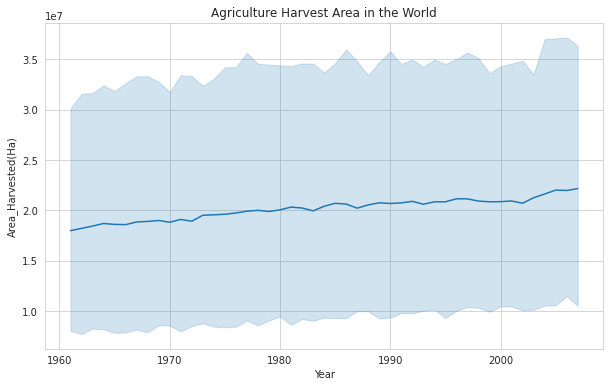

In [503]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.lineplot(x="Year", y="Area_Harvested(Ha)", data=df_world).set(title='Agriculture Harvest Area in the World')

### **Top 10 Countries with Largest Harvest Area**

In [504]:
top10_harvest = (allharvest_country
            .groupby('Area')
            .agg(Harvest_Area=('Area_Harvested(Ha)','sum'))
            .reset_index()
            .sort_values('Harvest_Area',ascending=False)
            .head(10)
            )

top10_harvest.reset_index(inplace = True, drop = True)
top10_harvest.index = top10_harvest.index + 1
top10_harvest = top10_harvest.drop(columns=['Harvest_Area'])

print('Top 10 Countries with Largest Harvest Area (ha) from 1961-2007')
top10_harvest

Top 10 Countries with Largest Harvest Area (ha) from 1961-2007


,Area
1,India
2,China
3,USSR
4,Brazil
5,Nigeria
6,Canada
7,Indonesia
8,Argentina
9,Turkey
10,Australia


In [505]:
s = allharvest_country2.sum()
allharvest_top10 = allharvest_country2[s.sort_values(ascending=False).index[:10]]
allharvest_top10

Area,India,China,USSR,Brazil,Nigeria,Canada,Indonesia,Argentina,Turkey,Australia
Year,,,,,,,,,,
1961,466938590.0,424633095.0,480496560.0,69944517.0,67742584.0,62310703.0,46066685.0,47124855.0,53467705.0,28716888.0
1962,476948982.0,421511976.0,497681976.0,73459104.0,68213584.0,65881451.0,50448675.0,42927385.0,53722881.0,30879537.0
1963,475733972.0,423177808.0,498168666.0,78119836.0,72717442.0,66953800.0,46424159.0,51184538.0,53826487.0,31123422.0
1964,480497694.0,432487451.0,510595916.0,80633904.0,75188385.0,67293303.0,51848962.0,53891408.0,54083524.0,33130309.0
1965,475724720.0,424351791.0,495494621.0,85943637.0,80651894.0,69004117.0,48462031.0,46487288.0,54087595.0,33289997.0
1966,471005937.0,431960877.0,483762320.0,83480038.0,72650112.0,72085595.0,54278283.0,50070083.0,54558431.0,38723886.0
1967,484835237.0,426015325.0,476308492.0,94469265.0,75014756.0,71736293.0,48621276.0,53307249.0,54772101.0,39622969.0
1968,489586517.0,414331528.0,473941386.0,97409815.0,75728085.0,72467071.0,53547569.0,52833683.0,54906414.0,46833362.0
1969,494639719.0,418469951.0,475127800.0,101061457.0,90413257.0,70130178.0,50417779.0,52853007.0,55229156.0,42942991.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


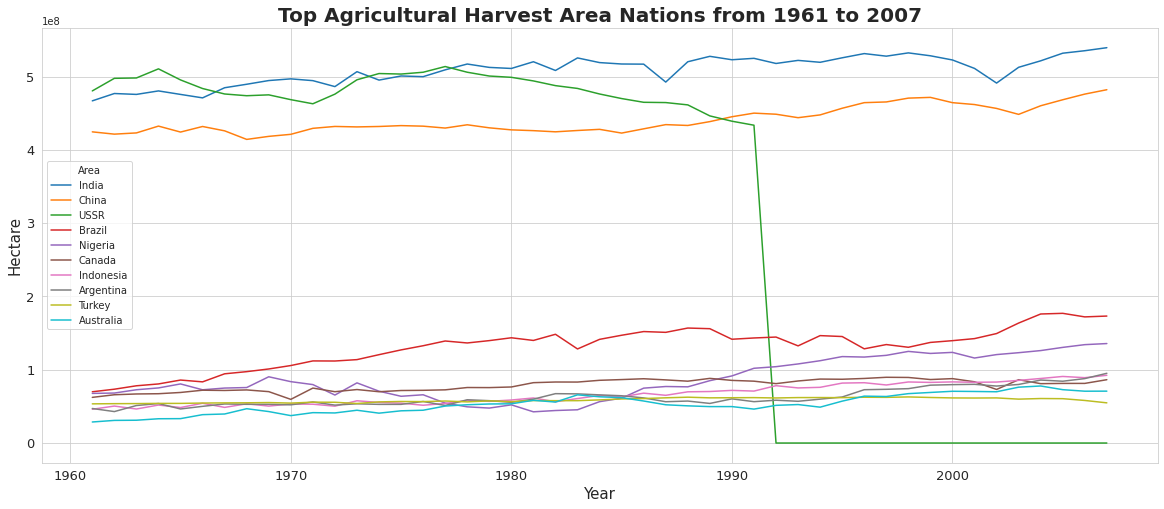

In [506]:
allharvest_top10.fillna(0, inplace=True)
ax = allharvest_top10.plot(kind='line', figsize=(20,8), stacked=False)
ax.set_title('Top Agricultural Harvest Area Nations from 1961 to 2007', fontsize=20, fontweight='bold')
ax.set_ylabel('Hectare', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.tick_params(labelsize=13)

## **World Agricultural Production**

### **Time Range Plot**

[Text(0.5, 1.0, 'Agriculture Production in the World')]

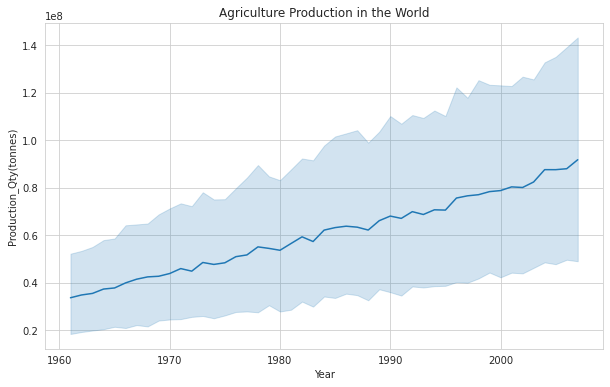

In [507]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.lineplot(x="Year", y="Production_Qty(tonnes)", data=df_world).set(title='Agriculture Production in the World')

### **Top 10 Countries with Largest Agriculture Production Quantity**

In [508]:
top10_production = (allproduction_country
            .groupby('Area')
            .agg(Production=('Production_Qty(tonnes)','sum'))
            .reset_index()
            .sort_values('Production',ascending=False)
            .head(10)
            )

top10_production.reset_index(inplace = True, drop = True)
top10_production.index = top10_production.index + 1
top10_production = top10_production.drop(columns=['Production'])

print('Top 10 Countries with Largest Agricultural Production (tonnes) Area from 1961-2007')
top10_production

Top 10 Countries with Largest Agricultural Production (tonnes) Area from 1961-2007


,Area
1,China
2,India
3,USSR
4,Brazil
5,France
6,Indonesia
7,Germany
8,Poland
9,Canada
10,Nigeria


In [509]:
s = allproduction_country2.sum()
allproduction_top10 = allproduction_country2[s.sort_values(ascending=False).index[:10]]
allproduction_top10

Area,China,India,USSR,Brazil,France,Indonesia,Germany,Poland,Canada,Nigeria
Year,,,,,,,,,,
1961,7.088240e+08,5.077195e+08,7.061795e+08,1.842117e+08,153639436.0,100900250.0,149350342.0,171785660.0,69449419.0,81244059.0
1962,7.456389e+08,5.049943e+08,6.999519e+08,1.964823e+08,177406944.0,109376705.0,181928323.0,146760878.0,112252014.0,84328325.0
1963,7.714771e+08,5.030141e+08,5.963605e+08,2.066699e+08,178557076.0,100485298.0,187968256.0,167041382.0,127835981.0,87324348.0
1964,8.120250e+08,5.252724e+08,8.287330e+08,2.119954e+08,174101859.0,113376336.0,183187296.0,170698063.0,109212562.0,88588317.0
1965,8.884627e+08,5.083332e+08,7.131403e+08,2.413053e+08,188614817.0,108471284.0,166070367.0,169546345.0,123595929.0,93179849.0
1966,9.664172e+08,5.144115e+08,8.643804e+08,2.336639e+08,172772791.0,111094229.0,172743532.0,176932785.0,145123284.0,85382380.0
1967,9.812775e+08,5.327757e+08,8.356623e+08,2.528041e+08,194351479.0,104240021.0,199409954.0,184339238.0,115593437.0,90964318.0
1968,9.649638e+08,5.633110e+08,9.204456e+08,2.577912e+08,202458133.0,119062149.0,197145124.0,193430534.0,132657045.0,92570466.0
1969,9.808926e+08,6.077240e+08,8.568216e+08,2.608689e+08,196034717.0,118988040.0,176411280.0,180601782.0,138579761.0,103900078.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


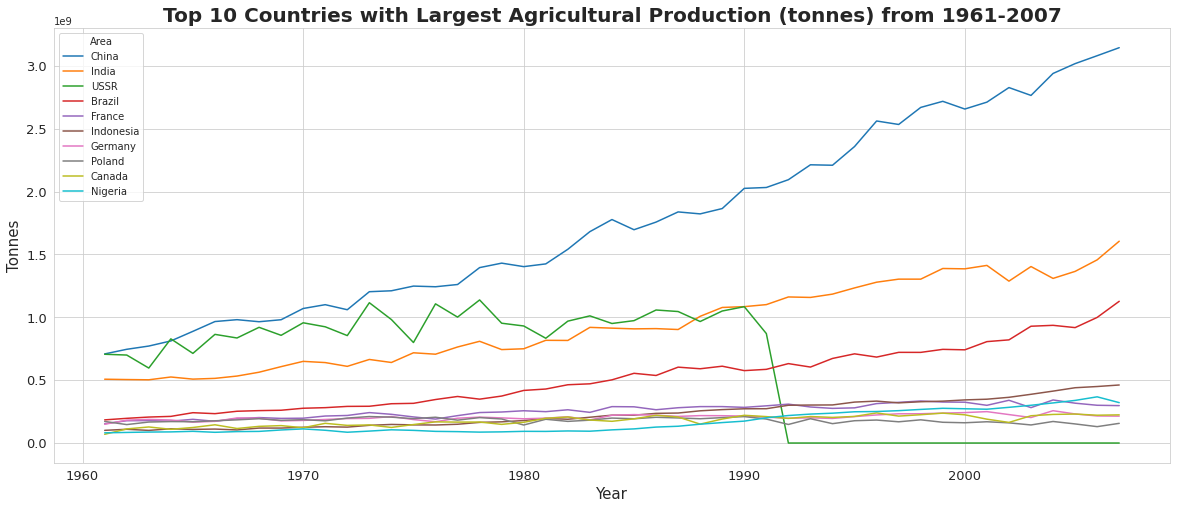

In [510]:
allproduction_top10.fillna(0, inplace=True)
ax = allproduction_top10.plot(kind='line', figsize=(20,8), stacked=False)
ax.set_title('Top 10 Countries with Largest Agricultural Production (tonnes) from 1961-2007', fontsize=20, fontweight='bold')
ax.set_ylabel('Tonnes', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.tick_params(labelsize=13)

## **World Agricultural Yields**

### **Time Range Plot**

[Text(0.5, 1.0, 'Agriculture Yield in the World')]

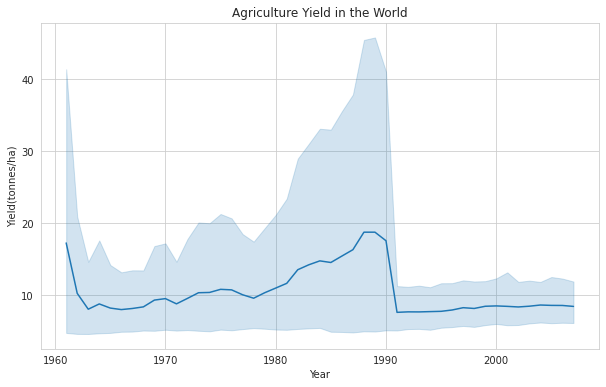

In [511]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.lineplot(x="Year", y="Yield(tonnes/ha)", data=df_world).set(title='Agriculture Yield in the World')

### **Top 10 Countries with Largest Agricultural Yield**

In [512]:
top10_yield = (allyield_country
            .groupby('Area')
            .agg(Yield=('Yield(tonnes/ha)','mean'))
            .reset_index()
            .sort_values('Yield',ascending=False)
            .head(10)
            )

top10_yield.reset_index(inplace = True, drop = True)
top10_yield.index = top10_yield.index + 1
top10_yield = top10_yield.drop(columns=['Yield'])

print('Top 10 Countries with Largest Agricultural Yield (tonnes/ha) Area from 1961-2007')
top10_yield

Top 10 Countries with Largest Agricultural Yield (tonnes/ha) Area from 1961-2007


,Area
1,Netherlands
2,Iceland
3,Belgium
4,Denmark
5,Kuwait
6,Switzerland
7,Belgium-Luxembourg
8,Guyana
9,Norway
10,Ireland


In [513]:
s = allyield_country2.mean()
allyield_top10 = allyield_country2[s.sort_values(ascending=False).index[:10]]
allyield_top10

Area,Netherlands,Iceland,Belgium,Denmark,Kuwait,Switzerland,Belgium-Luxembourg,Guyana,Norway,Ireland
Year,,,,,,,,,,
1961,49.893555,34.210575,NaN,16.596103,21.006780,27.674824,22.127246,148.700377,16.834182,16.127191
1962,45.027414,34.346775,NaN,16.456410,72.831150,28.204961,19.982722,139.559754,15.308225,17.096627
1963,53.765240,33.277675,NaN,17.189340,57.036813,29.795515,20.716109,99.333735,17.046121,16.018895
1964,89.033238,36.680600,NaN,17.427215,58.136963,30.289955,26.657237,79.372912,16.031227,16.841305
1965,72.558110,41.728037,NaN,17.363762,60.653475,25.152782,23.728965,63.906935,16.722988,16.929073
1966,72.963586,41.352050,NaN,18.333873,52.426975,30.098926,23.196261,77.397500,17.766935,18.170445
1967,90.903176,41.962125,NaN,19.600748,53.187937,34.946735,27.982224,64.984742,17.555723,18.341459
1968,89.678195,41.438887,NaN,20.218867,13.168562,29.296288,27.038096,43.610319,19.479254,18.959155
1969,100.825669,40.278312,NaN,18.842945,12.618131,30.873041,27.247459,27.640908,19.054919,19.118623


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


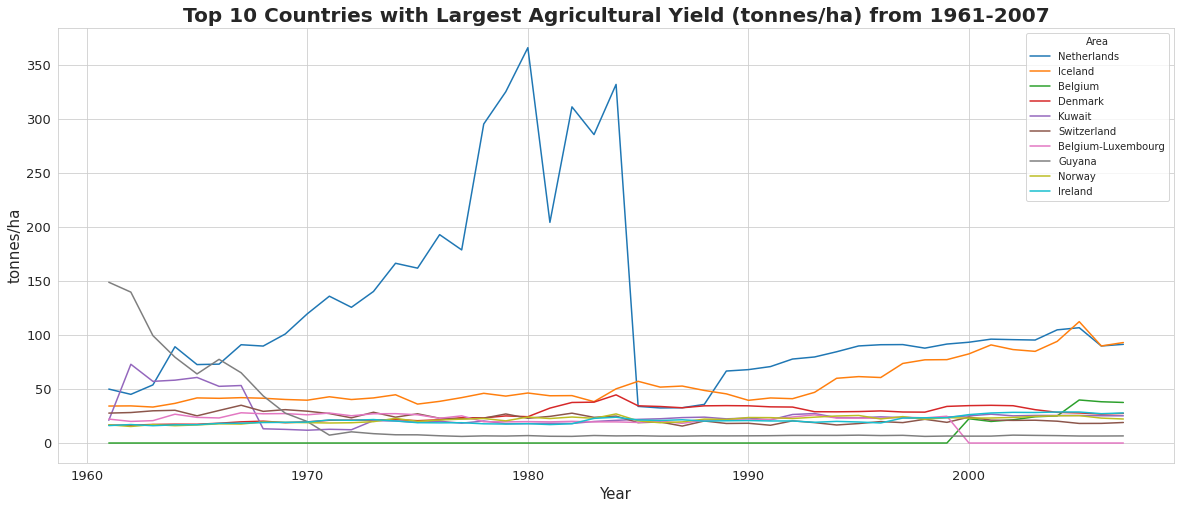

In [514]:
allyield_top10.fillna(0, inplace=True)
ax = allyield_top10.plot(kind='line', figsize=(20,8), stacked=False)
ax.set_title('Top 10 Countries with Largest Agricultural Yield (tonnes/ha) from 1961-2007', fontsize=20, fontweight='bold')
ax.set_ylabel('tonnes/ha', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.tick_params(labelsize=13)

## **World Comparison**

In [515]:
df_world2 = df_world.drop(columns=['Crops_Type', 'Area'])
#df_world2 = df_world2.groupby(['Year']).sum().reset_index()
df_world2 = (df_world2.groupby(['Year']).agg(Area_Harvested=('Area_Harvested(Ha)','sum'), Production_tonnes=('Production_Qty(tonnes)','sum'), Yield_tonnesperha=('Yield(tonnes/ha)','mean')).sort_values(by = ['Year'], ascending=False).reset_index())
df_world2 = df_world2.rename(columns={"Area_Harvested":"Harvest Area (Hectare)", 'Production_tonnes': 'Production (tonnes)', 'Yield_tonnesperha' : 'Yield (tonnes/hectare)'})
df_world2.head()

,Year,Harvest Area (Hectare),Production (tonnes),Yield (tonnes/hectare)
0,2007,3.746314e+09,1.552369e+10,8.461400
1,2006,3.714759e+09,1.488397e+10,8.592154
2,2005,3.720619e+09,1.481573e+10,8.603070
3,2004,3.655697e+09,1.481719e+10,8.653490
4,2003,3.593221e+09,1.394056e+10,8.490311


In [516]:
#df_worldm = df_world2.melt('Year', var_name='Indicator', value_name='Value')

In [517]:
#fig, ax = plt.subplots(figsize=(10,6))
#sns.relplot(data=df_worldm, x="Year", y="Value", hue="Indicator",kind="line", height=10, aspect=.7).set(title='World Agriculture 1961-2007')

### **Plot Pattern Comparison**

<Figure size 1440x1296 with 0 Axes>

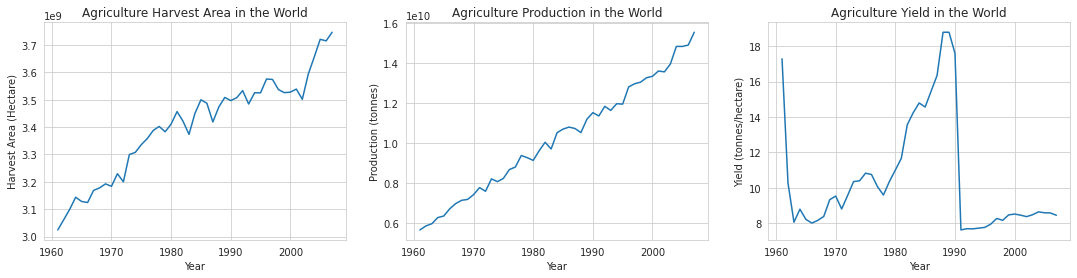

In [518]:
plt.figure(figsize=(20,18))
fig.tight_layout()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plt.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=None)
sns.lineplot(x="Year", y="Harvest Area (Hectare)", data=df_world2, ax = ax1).set(title='Agriculture Harvest Area in the World')
sns.lineplot(x="Year", y="Production (tonnes)", data=df_world2, ax = ax2).set(title='Agriculture Production in the World')
sns.lineplot(x="Year", y="Yield (tonnes/hectare)", data=df_world2, ax = ax3).set(title='Agriculture Yield in the World')
fig.show()

# **Indonesia Data**

In [519]:
df_Indo = df[df.Area == 'Indonesia']
df_Indo['Yield(tonnes/ha)'] = df_Indo['Yield(hg/ha)']/10000
df_Indo = df_Indo.drop(columns=['Yield(hg/ha)', 'Area'])
df_Indo.reset_index(inplace = True, drop = True)
df_Indo.index.name = ""
df_Indo.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Crops_Type,Area_Harvested(Ha),Production_Qty(tonnes),Yield(tonnes/ha)
,,,,,
0,1961,arecanuts,65000.0,13000.0,0.2000
1,1961,avocados,5500.0,30000.0,5.4545
2,1961,bananas,126000.0,800000.0,6.3492
3,1961,beans_dry,270000.0,300000.0,1.1111
4,1961,beans_green,11300.0,26000.0,2.3008


## **Indonesia Harvest Area**

### **Time Range Plot**

[Text(0.5, 1.0, 'Agriculture Harvest Area in Indonesia')]

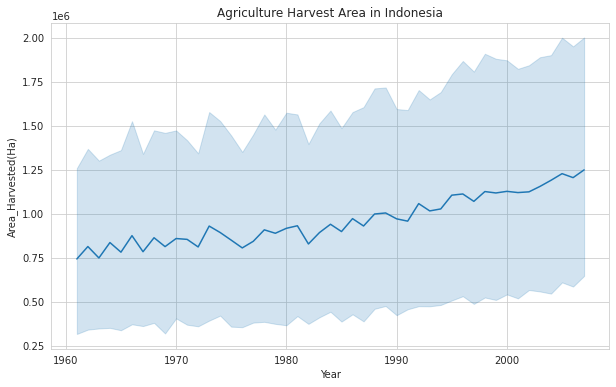

In [520]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.lineplot(x="Year", y="Area_Harvested(Ha)", data=df_Indo).set(title='Agriculture Harvest Area in Indonesia')

### **Top 10 Crops Category with Largest Harvest Area**

In [521]:
allharvest_indo = df_Indo.groupby(['Crops_Type','Year'])['Area_Harvested(Ha)'].sum().reset_index()
allharvest_indo.head()

,Crops_Type,Year,Area_Harvested(Ha)
0,arecanuts,1961,65000.0
1,arecanuts,1962,65000.0
2,arecanuts,1963,65000.0
3,arecanuts,1964,70000.0
4,arecanuts,1965,70000.0


In [522]:
allharvest_indo2 = allharvest_indo.pivot(index='Year', columns='Crops_Type', values='Area_Harvested(Ha)')
allharvest_indo2.head()

Crops_Type,arecanuts,avocados,bananas,beans_dry,beans_green,cabbages_and_other_brassicas,carrots_and_turnips,cashew_nuts_with_shell,cassava,castor_oil_seed,...,sugar_crops_nes,sweet_potatoes,tea,tobacco_unmanufactured,tomatoes,treenuts_total,vanilla,vegetables_fresh_nes,vegetables_melons_total,watermelons
Year,,,,,,,,,,,,,,,,,,,,,
1961,65000.0,5500.0,126000.0,270000.0,11300.0,8500.0,600.0,NaN,1478000.0,6000.0,...,102000.0,366000.0,107000.0,223900.0,2500.0,NaN,800.0,209000.0,450300.0,NaN
1962,65000.0,5500.0,130000.0,272000.0,12200.0,8700.0,650.0,NaN,1449000.0,6000.0,...,106000.0,544000.0,107000.0,188500.0,2500.0,NaN,800.0,209000.0,460550.0,NaN
1963,65000.0,5500.0,135000.0,260000.0,12200.0,9000.0,650.0,NaN,1598000.0,6000.0,...,110000.0,484000.0,105000.0,304500.0,3000.0,NaN,1000.0,209000.0,489250.0,NaN
1964,70000.0,6300.0,140000.0,270000.0,13000.0,9300.0,750.0,NaN,1579000.0,6000.0,...,114000.0,620000.0,102000.0,146700.0,3000.0,NaN,1000.0,209000.0,503750.0,NaN
1965,70000.0,6300.0,145000.0,280000.0,14400.0,9500.0,750.0,NaN,1754000.0,6000.0,...,118000.0,416000.0,101000.0,179300.0,2800.0,NaN,1000.0,209000.0,528050.0,NaN


In [523]:
allharvest_indoT = allharvest_indo2.T.drop_duplicates().T
s = allharvest_indoT.sum()
allharvest_top10indo = allharvest_indoT[s.sort_values(ascending=False).index[:10]]
allharvest_top10indo

Crops_Type,cereals_rice_milled_eqv,rice_paddy,oilcrops_primary,oilcakes_equivalent,coarse_grain_total,coconuts,natural_rubber,roots_and_tubers_total,cassava,oil_palm_fruit
Year,,,,,,,,,,
1961,9319000.0,6857000.0,2324065.0,2318065.0,2462000.0,1130000.0,1353000.0,2022000.0,1478000.0,70000.0
1962,10458000.0,7283000.0,2293800.0,2287800.0,3175000.0,1120000.0,1358000.0,2179000.0,1449000.0,70000.0
1963,9290000.0,6731000.0,2183600.0,2177600.0,2559000.0,1102000.0,1362000.0,2277000.0,1598000.0,75000.0
1964,10626000.0,6980000.0,2243900.0,2237900.0,3646000.0,1104000.0,1350000.0,2403000.0,1579000.0,80000.0
1965,9834000.0,7327000.0,2223200.0,2217200.0,2507000.0,1090000.0,1418000.0,2382000.0,1754000.0,80000.0
1966,11469000.0,7691000.0,2244600.0,2238600.0,3778000.0,1050000.0,1409000.0,2138000.0,1513000.0,85000.0
1967,10063000.0,7516000.0,2186800.0,2180800.0,2547000.0,1044000.0,1388000.0,2118000.0,1524000.0,85000.0
1968,11240780.0,8020770.0,2405701.0,2399701.0,3220010.0,1127000.0,1432000.0,2155791.0,1503410.0,90000.0
1969,10448440.0,8013620.0,2367196.0,2358321.0,2434820.0,1180000.0,1512000.0,2098589.0,1467146.0,90000.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


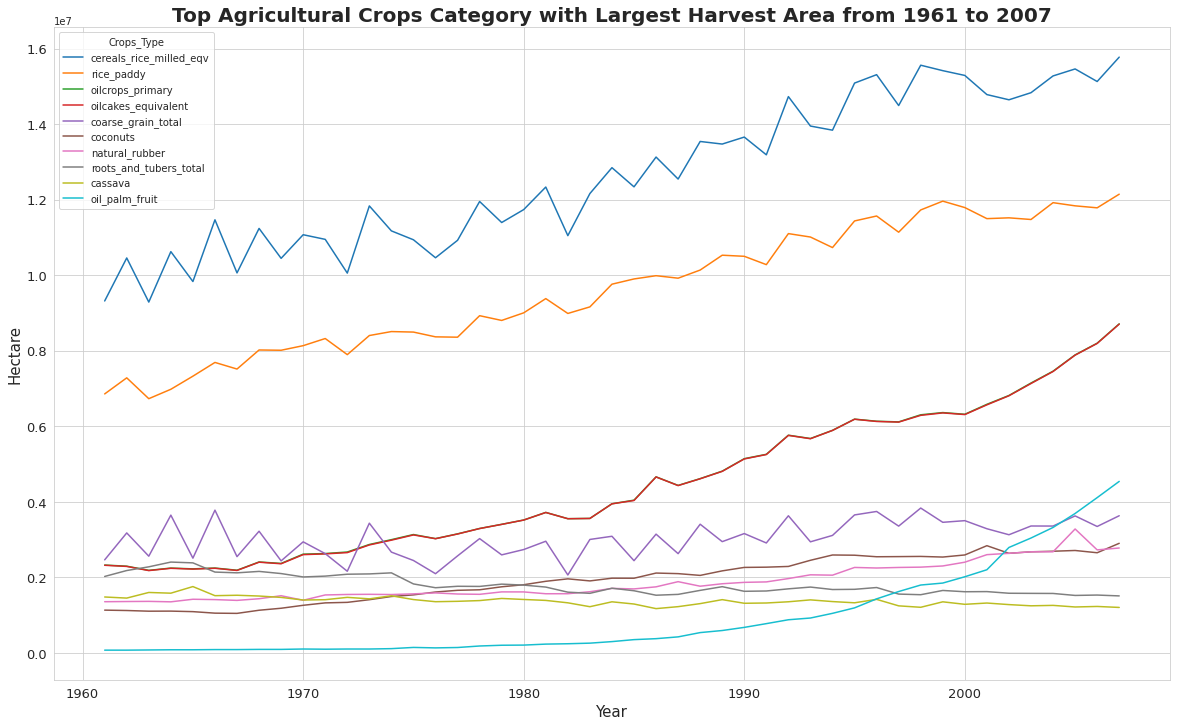

In [524]:
allharvest_top10indo.fillna(0, inplace=True)
ax = allharvest_top10indo.plot(kind='line', figsize=(20,12), stacked=False)
ax.set_title('Top Agricultural Crops Category with Largest Harvest Area from 1961 to 2007', fontsize=20, fontweight='bold')
ax.set_ylabel('Hectare', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.tick_params(labelsize=13)

## **Indonesia Agricultural Production**

### **Time Range Plot**

[Text(0.5, 1.0, 'Agriculture Production in Indonesia')]

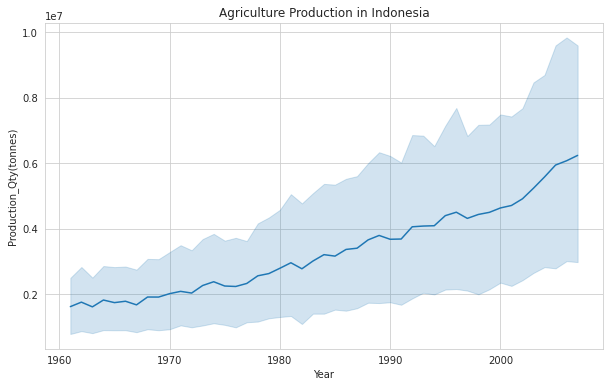

In [525]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.lineplot(x="Year", y="Production_Qty(tonnes)", data=df_Indo).set(title='Agriculture Production in Indonesia')

### **Top 10 Crops Categories with Largest Agriculture Production Quantity**

In [526]:
allproduction_indo = df_Indo.groupby(['Crops_Type','Year'])['Production_Qty(tonnes)'].sum().reset_index()
allproduction_indo.head()

,Crops_Type,Year,Production_Qty(tonnes)
0,arecanuts,1961,13000.0
1,arecanuts,1962,13000.0
2,arecanuts,1963,13000.0
3,arecanuts,1964,14000.0
4,arecanuts,1965,14000.0


In [527]:
allproduction_indo2 = allproduction_indo.pivot(index='Year', columns='Crops_Type', values='Production_Qty(tonnes)')
allproduction_indo2.head()

Crops_Type,arecanuts,avocados,bananas,beans_dry,beans_green,cabbages_and_other_brassicas,carrots_and_turnips,cashew_nuts_with_shell,cassava,castor_oil_seed,...,sugar_crops_nes,sweet_potatoes,tea,tobacco_unmanufactured,tomatoes,treenuts_total,vanilla,vegetables_fresh_nes,vegetables_melons_total,watermelons
Year,,,,,,,,,,,,,,,,,,,,,
1961,13000.0,30000.0,800000.0,300000.0,26000.0,75000.0,3500.0,NaN,11189500.0,2000.0,...,255000.0,2463700.0,77100.0,85800.0,5000.0,NaN,100.0,750000.0,1625500.0,NaN
1962,13000.0,30000.0,800000.0,310000.0,28000.0,78000.0,4000.0,NaN,11386000.0,2000.0,...,265000.0,3679900.0,80400.0,81600.0,5000.0,NaN,100.0,750000.0,1664500.0,NaN
1963,13000.0,30000.0,850000.0,290000.0,28000.0,80000.0,4000.0,NaN,11678700.0,2000.0,...,275000.0,3069800.0,75600.0,93900.0,6000.0,NaN,150.0,750000.0,1742000.0,NaN
1964,14000.0,35000.0,880000.0,300000.0,30000.0,83000.0,4500.0,NaN,12261700.0,2000.0,...,285000.0,3958100.0,74400.0,48400.0,6000.0,NaN,150.0,750000.0,1789500.0,NaN
1965,14000.0,35000.0,950000.0,315000.0,33000.0,85000.0,4500.0,NaN,12643400.0,2000.0,...,295000.0,2651200.0,79800.0,78400.0,6000.0,NaN,150.0,750000.0,1863000.0,NaN


In [528]:
allproduction_indoT = allproduction_indo2.T.drop_duplicates().T
s = allproduction_indoT.sum()
allproduction_top10indo = allproduction_indoT[s.sort_values(ascending=False).index[:10]]
allproduction_top10indo

Crops_Type,cereals_total,rice_paddy,cereals_rice_milled_eqv,sugar_cane,roots_and_tubers_total,oil_palm_fruit,cassava,coconuts,fruit_excl_melons_total,coarse_grain_total
Year,,,,,,,,,,
1961,14367100.0,12084000.0,10343127.0,10931200.0,14553200.0,935000.0,11189500.0,5650000.0,2292000.0,2283100.0
1962,16246900.0,13004000.0,11916567.0,10211100.0,16005900.0,895000.0,11386000.0,5600000.0,2298000.0,3242900.0
1963,13952800.0,11595000.0,10091664.0,8959500.0,15733500.0,895000.0,11678700.0,5510000.0,2455000.0,2357800.0
1964,16074600.0,12306000.0,11976701.0,10959400.0,17246800.0,932000.0,12261700.0,5520000.0,2472000.0,3768600.0
1965,15339500.0,12975000.0,11018824.0,11224800.0,16363600.0,895000.0,12643400.0,5450000.0,2638000.0,2364500.0
1966,17367400.0,13650000.0,12821949.0,9549900.0,14823100.0,954000.0,11232500.0,5250000.0,2707000.0,3717400.0
1967,15591101.0,13222000.0,11188174.0,10211700.0,14055100.0,933000.0,10746600.0,5700000.0,2737000.0,2369101.0
1968,20328850.0,17162800.0,14613637.0,8858300.0,14955247.0,1000000.0,11355630.0,5890000.0,2828000.0,3166050.0
1969,20313080.0,18020200.0,14312353.0,9990100.0,14490710.0,1200000.0,10916530.0,6070000.0,3003000.0,2292880.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


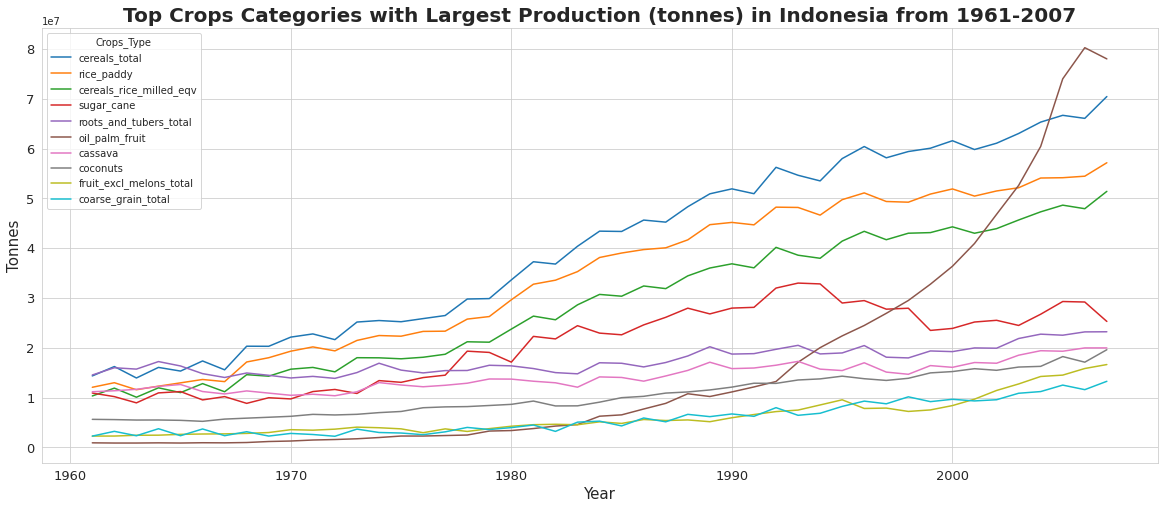

In [529]:
allproduction_top10indo.fillna(0, inplace=True)
ax = allproduction_top10indo.plot(kind='line', figsize=(20,8), stacked=False)
ax.set_title('Top Crops Categories with Largest Production (tonnes) in Indonesia from 1961-2007', fontsize=20, fontweight='bold')
ax.set_ylabel('Tonnes', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.tick_params(labelsize=13)

## **Indonesia Agricultural Yields**

### **Time Range Plot**

[Text(0.5, 1.0, 'Agriculture Yield in Indonesia')]

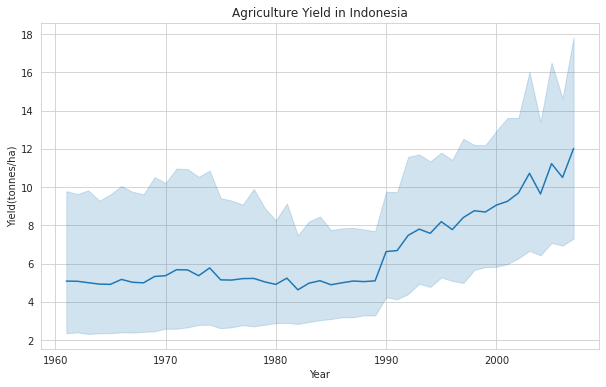

In [530]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.lineplot(x="Year", y="Yield(tonnes/ha)", data=df_Indo).set(title='Agriculture Yield in Indonesia')

### **Top 10 Crops Categories with Largest Agricultural Yield**

In [531]:
allyield_indo = df_Indo.groupby(['Crops_Type','Year'])['Yield(tonnes/ha)'].mean().reset_index()
allyield_indo.head()

,Crops_Type,Year,Yield(tonnes/ha)
0,arecanuts,1961,0.2
1,arecanuts,1962,0.2
2,arecanuts,1963,0.2
3,arecanuts,1964,0.2
4,arecanuts,1965,0.2


In [532]:
allyield_indo2 = allyield_indo.pivot(index='Year', columns='Crops_Type', values='Yield(tonnes/ha)')
allyield_indo2.head()

Crops_Type,arecanuts,avocados,bananas,beans_dry,beans_green,cabbages_and_other_brassicas,carrots_and_turnips,cashew_nuts_with_shell,cassava,castor_oil_seed,...,sugar_crops_nes,sweet_potatoes,tea,tobacco_unmanufactured,tomatoes,treenuts_total,vanilla,vegetables_fresh_nes,vegetables_melons_total,watermelons
Year,,,,,,,,,,,,,,,,,,,,,
1961,0.2,5.4545,6.3492,1.1111,2.3008,8.8235,5.8333,NaN,7.5707,0.3333,...,2.5,6.7314,0.7205,0.3832,2.0000,NaN,0.125,3.5885,3.6098,NaN
1962,0.2,5.4545,6.1538,1.1397,2.2950,8.9655,6.1538,NaN,7.8578,0.3333,...,2.5,6.7645,0.7514,0.4328,2.0000,NaN,0.125,3.5885,3.6141,NaN
1963,0.2,5.4545,6.2962,1.1153,2.2950,8.8888,6.1538,NaN,7.3083,0.3333,...,2.5,6.3425,0.7200,0.3083,2.0000,NaN,0.150,3.5885,3.5605,NaN
1964,0.2,5.5555,6.2857,1.1111,2.3076,8.9247,6.0000,NaN,7.7654,0.3333,...,2.5,6.3840,0.7294,0.3299,2.0000,NaN,0.150,3.5885,3.5523,NaN
1965,0.2,5.5555,6.5517,1.1250,2.2916,8.9473,6.0000,NaN,7.2083,0.3333,...,2.5,6.3730,0.7900,0.4372,2.1428,NaN,0.150,3.5885,3.5280,NaN


In [533]:
allyield_indoT = allyield_indo2.T.drop_duplicates().T
s = allyield_indoT.mean()
allyield_top10indo = allyield_indoT[s.sort_values(ascending=False).index[:10]]
allyield_top10indo

Crops_Type,sugar_cane,mushrooms_and_truffles,papayas,pineapples,other_melons_inc_cantaloupes,oil_palm_fruit,cabbages_and_other_brassicas,cauliflowers_and_broccoli,bananas,potatoes
Year,,,,,,,,,,
1961,136.6399,NaN,11.1111,5.0000,NaN,13.3571,8.8235,NaN,6.3492,6.0000
1962,136.1479,NaN,11.1111,5.0000,NaN,12.7857,8.9655,NaN,6.1538,6.0000
1963,135.7500,NaN,10.9090,5.0000,NaN,11.9333,8.8888,NaN,6.2962,5.9090
1964,130.4690,NaN,10.9090,5.0000,NaN,11.6499,8.9247,NaN,6.2857,5.5833
1965,130.5209,NaN,10.7692,5.0000,NaN,11.1875,8.9473,NaN,6.5517,5.7500
1966,142.9625,NaN,10.7142,5.0000,NaN,11.2235,9.1578,NaN,6.1250,5.0000
1967,136.1559,NaN,10.7142,5.0000,NaN,10.9764,9.0000,NaN,5.9375,4.7222
1968,132.6092,NaN,10.0000,6.5217,NaN,11.1111,8.6000,NaN,5.4117,4.4999
1969,148.4412,NaN,10.2857,5.7142,NaN,13.3333,9.1666,NaN,5.5149,5.2000


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


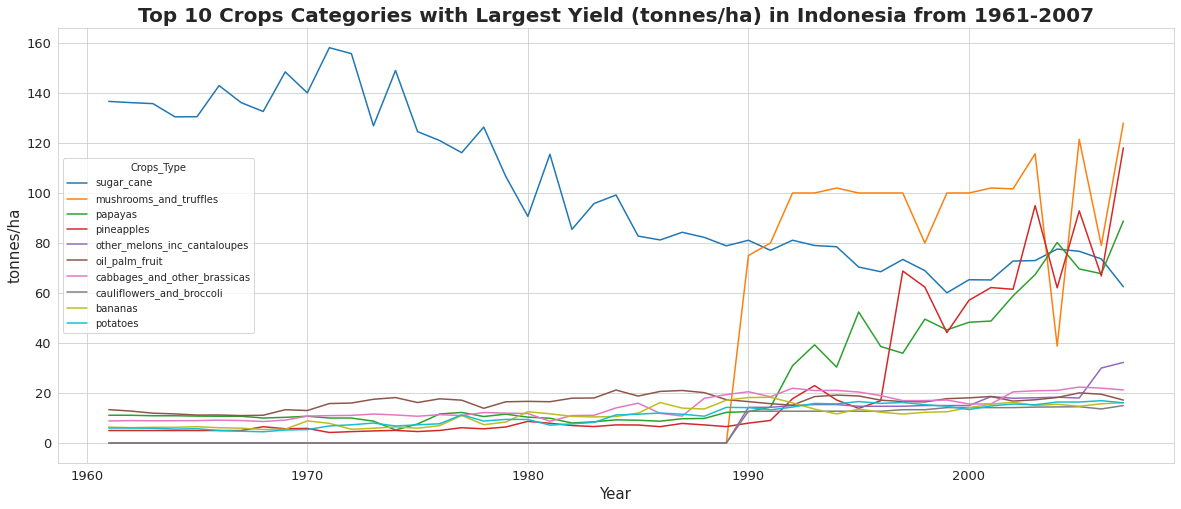

In [534]:
allyield_top10indo.fillna(0, inplace=True)
ax = allyield_top10indo.plot(kind='line', figsize=(20,8), stacked=False)
ax.set_title('Top 10 Crops Categories with Largest Yield (tonnes/ha) in Indonesia from 1961-2007', fontsize=20, fontweight='bold')
ax.set_ylabel('tonnes/ha', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.tick_params(labelsize=13)

## **Indonesia Data Comparison**

In [535]:
df_Indo2 = df_Indo.drop(columns=['Crops_Type'])
df_Indo2 = (df_Indo2.groupby(['Year']).agg(Area_Harvested=('Area_Harvested(Ha)','sum'), Production_tonnes=('Production_Qty(tonnes)','sum'), Yield_tonnesperha=('Yield(tonnes/ha)','mean')).sort_values(by = ['Year'], ascending=False).reset_index())
df_Indo2 = df_Indo2.rename(columns={"Area_Harvested":"Harvest Area (Hectare)", 'Production_tonnes': 'Production (tonnes)', 'Yield_tonnesperha' : 'Yield (tonnes/hectare)'})
df_Indo2.head()

,Year,Harvest Area (Hectare),Production (tonnes),Yield (tonnes/hectare)
0,2007,92445996.0,461674341.0,12.020074
1,2006,89183622.0,449570157.0,10.505819
2,2005,90857058.0,439896295.0,11.228820
3,2004,88074656.0,413032195.0,9.643381
4,2003,85494951.0,387691949.0,10.726112


In [536]:
#df_worldm = df_world2.melt('Year', var_name='Indicator', value_name='Value')

In [537]:
#fig, ax = plt.subplots(figsize=(10,6))
#sns.relplot(data=df_worldm, x="Year", y="Value", hue="Indicator",kind="line", height=10, aspect=.7).set(title='World Agriculture 1961-2007')

### **Plot Pattern Comparison**

<Figure size 1440x1296 with 0 Axes>

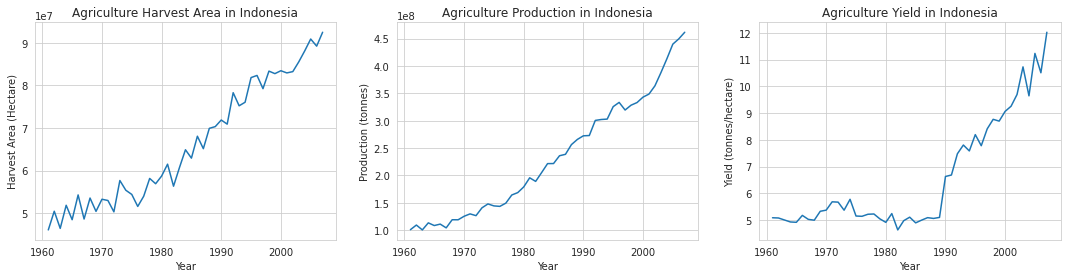

In [538]:
plt.figure(figsize=(20,18))
fig.tight_layout()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plt.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=None)
sns.lineplot(x="Year", y="Harvest Area (Hectare)", data=df_Indo2, ax = ax1).set(title='Agriculture Harvest Area in Indonesia')
sns.lineplot(x="Year", y="Production (tonnes)", data=df_Indo2, ax = ax2).set(title='Agriculture Production in Indonesia')
sns.lineplot(x="Year", y="Yield (tonnes/hectare)", data=df_Indo2, ax = ax3).set(title='Agriculture Yield in Indonesia')
fig.show()

# **Prediction for Sugarcane (Indonesia)**

In [539]:
df_Indo.head()

,Year,Crops_Type,Area_Harvested(Ha),Production_Qty(tonnes),Yield(tonnes/ha)
,,,,,
0,1961,arecanuts,65000.0,13000.0,0.2000
1,1961,avocados,5500.0,30000.0,5.4545
2,1961,bananas,126000.0,800000.0,6.3492
3,1961,beans_dry,270000.0,300000.0,1.1111
4,1961,beans_green,11300.0,26000.0,2.3008


In [546]:
#indo = df_Indo.groupby(['Year']).sum().reset_index()
sc = df_Indo[df_Indo.Crops_Type == 'sugar_cane'].reset_index()
sc.head()

,,Year,Crops_Type,Area_Harvested(Ha),Production_Qty(tonnes),Yield(tonnes/ha)
0,53,1961,sugar_cane,80000.0,10931200.0,136.6399
1,115,1962,sugar_cane,75000.0,10211100.0,136.1479
2,177,1963,sugar_cane,66000.0,8959500.0,135.7500
3,239,1964,sugar_cane,84000.0,10959400.0,130.4690
4,301,1965,sugar_cane,86000.0,11224800.0,130.5209


In [547]:
#sc = sc.drop(columns=['Crops_Type'])
#sc.drop([sc.columns[[0, 2]]], axis=1, inplace=True)
sc.drop([sc.columns[0]], axis=1, inplace=True)
sc.drop([sc.columns[1]], axis=1, inplace=True)
sc.head()

,Year,Area_Harvested(Ha),Production_Qty(tonnes),Yield(tonnes/ha)
0,1961,80000.0,10931200.0,136.6399
1,1962,75000.0,10211100.0,136.1479
2,1963,66000.0,8959500.0,135.7500
3,1964,84000.0,10959400.0,130.4690
4,1965,86000.0,11224800.0,130.5209


In [548]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    47 non-null     int64  
 1   Area_Harvested(Ha)      47 non-null     float64
 2   Production_Qty(tonnes)  47 non-null     float64
 3   Yield(tonnes/ha)        47 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.6 KB


## **Simple Linear Regression**

### **Yield**

In [552]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

X = sc[['Year']]
Y = sc[['Yield(tonnes/ha)']]

lr.fit(X,Y)

pred=lr.predict(Y)
pred_sc = pred[0:11]
pred_sc

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Yield(tonnes/ha)
Feature names seen at fit time, yet now missing:
- Year

  warnings.warn(message, FutureWarning)


array([[3812.30251127],
       [3813.29088154],
       [3814.09021595],
       [3824.69912525],
       [3824.59486424],
       [3799.6011498 ],
       [3813.27481048],
       [3820.39971459],
       [3788.5950844 ],
       [3805.43996723],
       [3769.14086388]])

(0.0, 163.5117885135324)

<Figure size 1440x720 with 0 Axes>

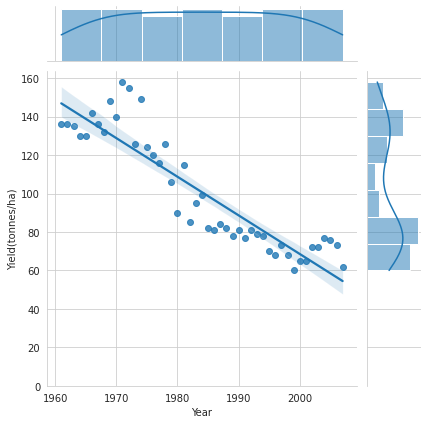

In [553]:
plt.figure(figsize=(20, 10))
sns.jointplot(x="Year", y="Yield(tonnes/ha)", data=sc.astype(int), kind="reg")
plt.ylim(0,)

### **Production**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Production_Qty(tonnes)
Feature names seen at fit time, yet now missing:
- Year

  warnings.warn(message, FutureWarning)


(0.0, 36286318.096165255)

<Figure size 1440x720 with 0 Axes>

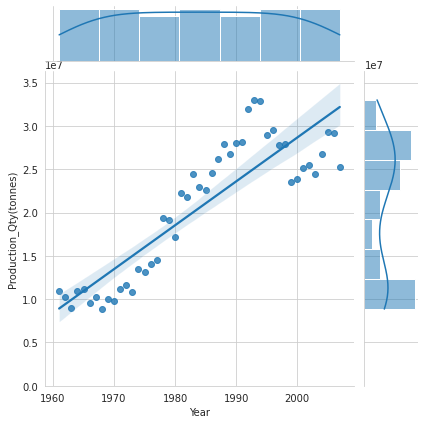

In [554]:
X = sc[['Year']]
Y = sc[['Production_Qty(tonnes)']]

lr.fit(X,Y)

pred=lr.predict(Y)
pred_sc = pred[0:11]
plt.figure(figsize=(20, 10))
sns.jointplot(x="Year", y="Production_Qty(tonnes)", data=sc.astype(int), kind="reg")
plt.ylim(0,)

### **Harvest Area**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Area_Harvested(Ha)
Feature names seen at fit time, yet now missing:
- Year

  warnings.warn(message, FutureWarning)


(0.0, 516607.7353320876)

<Figure size 1440x720 with 0 Axes>

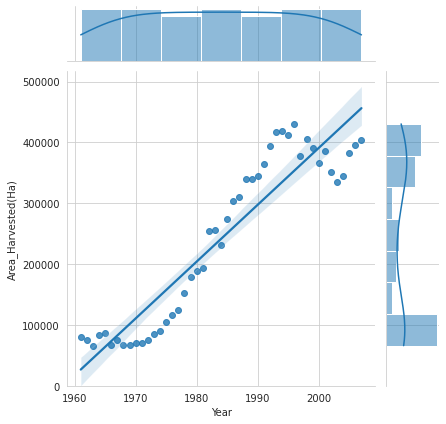

In [555]:
X = sc[['Year']]
Y = sc[['Area_Harvested(Ha)']]

lr.fit(X,Y)

pred=lr.predict(Y)
pred_sc = pred[0:11]
plt.figure(figsize=(20, 10))
sns.jointplot(x="Year", y="Area_Harvested(Ha)", data=sc.astype(int), kind="reg")
plt.ylim(0,)